In [1]:
import numpy as np
from utils.lattice_utils import plot_lattice
import os
from utils.mat_utils import frac_to_cart_coords, get_pbc_cutoff_graphs
import torch


In [2]:
def plot_origin_lattice_from_path(path, name, cutoff=1.0,max_num_neighbors_threshold=3, save_dir=None):
    full_path = os.path.join(path,name)
    lattice_npz = np.load(full_path)
    frac_coords = lattice_npz['origin_frac_coords']
    lengths = lattice_npz['origin_lengths']
    angles = lattice_npz['origin_angles']
    atom_types = lattice_npz['origin_atom_types']
    num_atoms = torch.tensor([atom_types.shape[0]])
    frac_coords, lengths, angles = torch.from_numpy(frac_coords),torch.from_numpy(lengths), torch.from_numpy(angles)
    cart_coords = frac_to_cart_coords(frac_coords,lengths,
                                      angles, num_atoms)
    print('num_atoms', num_atoms)
    try:
        # raise Exception
        edge_index = lattice_npz['origin_edge_index']
    except:
        edge_index, _,_ = get_pbc_cutoff_graphs(cart_coords, lengths, angles, num_atoms, cutoff=cutoff, max_num_neighbors_threshold=max_num_neighbors_threshold)
    print('edge_index \n', edge_index)
    plot_lattice(cart_coords,edge_index.T, save_dir=save_dir)

In [3]:
def plot_lattice_from_path(path, name, cutoff=1.0,max_num_neighbors_threshold=3, save_dir=None ):
    full_path = os.path.join(path,name)
    lattice_npz = np.load(full_path)
    frac_coords = lattice_npz['frac_coords']
    lengths = lattice_npz['lengths']
    angles = lattice_npz['angles']
    atom_types = lattice_npz['atom_types']
    num_atoms = torch.tensor([atom_types.shape[0]])
    frac_coords, lengths, angles = torch.from_numpy(frac_coords),torch.from_numpy(lengths).unsqueeze(0), torch.from_numpy(angles).unsqueeze(0)
    cart_coords = frac_to_cart_coords(frac_coords,lengths,
                                      angles, num_atoms)
    # cart_coords = frac_coords

    print('num_atoms', num_atoms)
    try:
        # raise Exception
        edge_index = lattice_npz['edge_index']
    except:
        edge_index, _,_ = get_pbc_cutoff_graphs(cart_coords, lengths, angles, num_atoms, cutoff=cutoff, max_num_neighbors_threshold=max_num_neighbors_threshold)
    print('edge_index \n', edge_index)
    try:
        print('Properteis: ', lattice_npz['prop_list'])
        print('mean:', lattice_npz['prop_list'].mean(), '\nvar:', lattice_npz['prop_list'].std())
    except:
        pass
    plot_lattice(cart_coords,edge_index.T, save_dir=save_dir)




num_atoms tensor([8])
edge_index 
 tensor([[1, 1, 3, 0, 0, 2, 1, 3, 3, 0, 2, 2, 6, 7, 7, 6, 6, 7, 4, 5, 5, 4, 4, 5],
        [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7]])


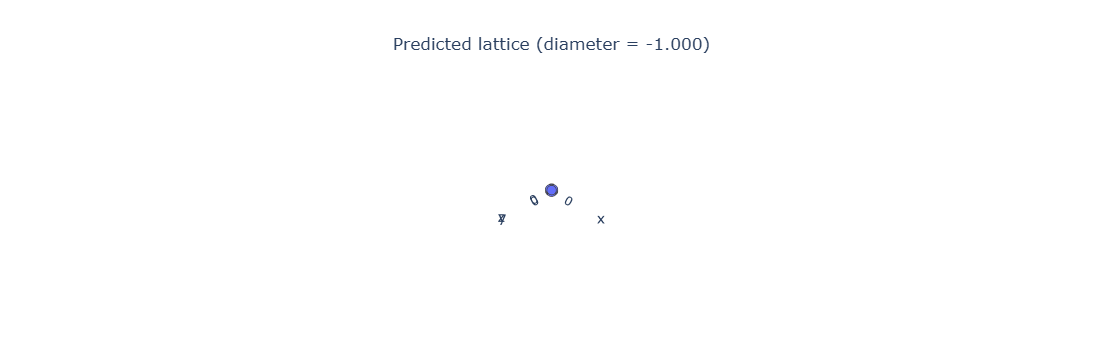

In [25]:
path = 'generated_mat'
name = 'LatticeStiffness_lattice_cubic.npz'
plot_lattice_from_path(path, name)


num_atoms tensor([47])
edge_index 
 [[ 0  0  0  0  0  1  1  1  1  1  2  2  3  3  4  4  4  4  5  5  5  5  6  6
   6  7  7  7  8  8  8  8  9  9  9  9 10 10 10 10 10 11 11 11 11 11 12 12
  13 13 14 14 14 14 15 15 15 15 16 16 16 17 17 17 18 18 18 18 19 19 19 19
  21 21 21 21 22 22 22 22 23 23 23 23 23 23 24 24 24 24 24 24 25 25 25 25
  25 25 26 26 26 26 26 26 27 29 33 37 39 41]
 [ 2 20 21 27 28  3 20 21 29 30 27 28 29 30 25 28 30 33 25 35 36 37  8 35
  39  9 36 41 20 22 35 39 20 22 36 41 12 20 21 31 43 13 20 21 32 44 31 43
  32 44 26 34 43 44 26 38 45 46 18 40 45 19 42 46 20 22 40 45 20 22 42 46
  23 24 33 34 23 24 37 38 25 26 27 31 39 40 25 26 29 32 41 42 28 30 33 35
  36 37 34 38 43 44 45 46 31 32 34 38 40 42]]


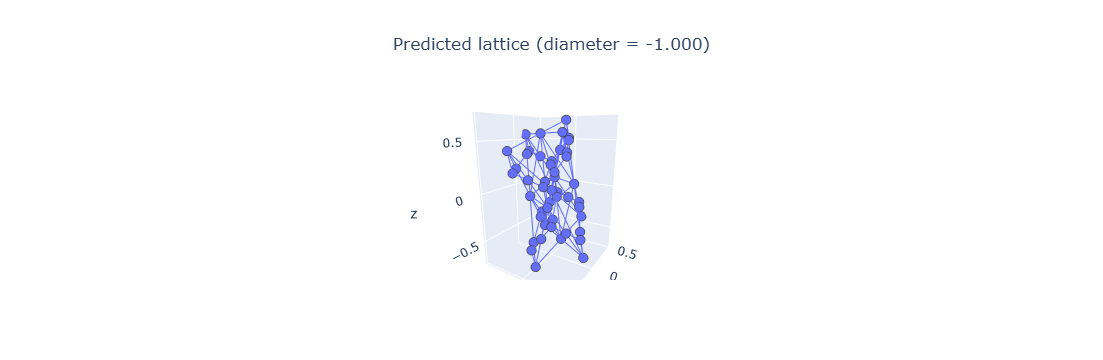

num_atoms tensor([46])
edge_index 
 [[ 0  1  0  2  3  3  1  3  8  5  9  3  8 11  1  9 11  0  2  3  6  0  1 14
   0  2  6 15 10 12  3  6  8 10 12 15  3  6  8 10 12 15 21 11  3  8 10 12
  21 22  1  9 11 14 23  2  6 15 19 21 22  1  9 11 14 18 25  5  9 11 13 17
  23 25 27  3  8 10 12 21 22 24  3  8 10 12 15 21 22 24 29  2  6 15 19 26
  10 12 24 31 10 12 15 24 31  5  9 11 27 28  1  5  9 11 13 14 17 23 27 28
  37  3  6  8 10 15 21 22 24 29 31 34 36 28  5 11 13 17 23 28 37 38 40  1
   5  9 11 13 14 17 23 25 27 28 37 38 40 41  1  5  9 11 14 23 25 27 28 37
  38 41 42  5  9 11 13 14 17 23 27 28 37 38 41 42 43  8 10 12 22 24 29 31
  39]
 [ 2  2  6  6  6  8  9 10 10 11 11 12 12 13 14 14 14 15 15 15 15 16 18 18
  19 19 19 19 20 20 21 21 21 21 21 21 22 22 22 22 22 22 22 23 24 24 24 24
  24 24 25 25 25 25 25 26 26 26 26 26 26 27 27 27 27 27 27 28 28 28 28 28
  28 28 28 29 29 29 29 29 29 29 31 31 31 31 31 31 31 31 31 32 32 32 32 32
  34 34 34 34 36 36 36 36 36 37 37 37 37 37 38 38 38 38 38 38 38 38 38

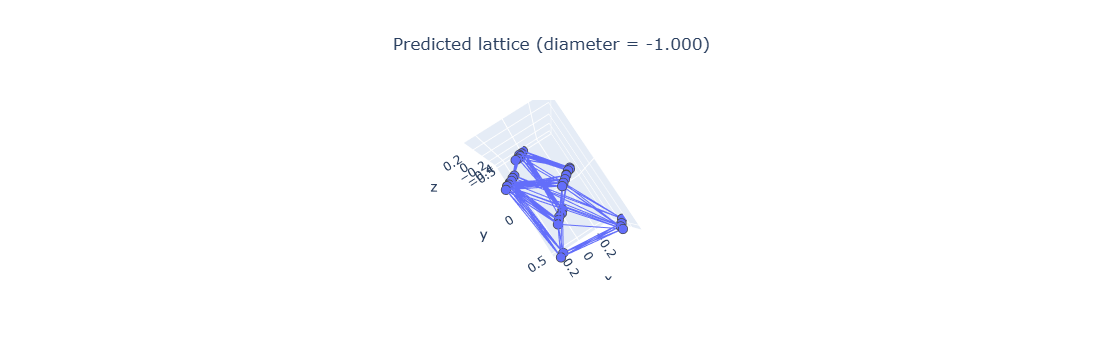

In [52]:
path = 'recon_mat/step50_'
name = 'LatticeStiffness_lattice_0.npz'
plot_origin_lattice_from_path(path,name)
plot_lattice_from_path(path, name)


num_atoms tensor([12])
edge_index 
 [[ 0  1  0  1  2  3  4  1  4  5  6  1  2  3  4  6  0  1  2  4  7  0  2  4
   5  6  9  0  3  7  9 10]
 [ 1  2  3  3  4  6  6  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
  10 10 10 11 11 11 11 11]]
Properteis:  [ 1.0381733e-02  3.4076090e-03  3.8050418e-03  1.9035465e-04
  9.8224496e-05 -1.5485543e-04  9.2431977e-03  3.6178224e-03
  4.4274691e-04  3.0448195e-05 -1.6342034e-04  1.1452152e-02
  3.8105948e-04 -1.4717528e-04  1.1682743e-05  3.3775824e-03
  5.5085169e-05  6.2412117e-05  3.5820922e-03  1.6839243e-04
  3.1840522e-03]
mean: 0.0025250593 
var: 0.0035491562


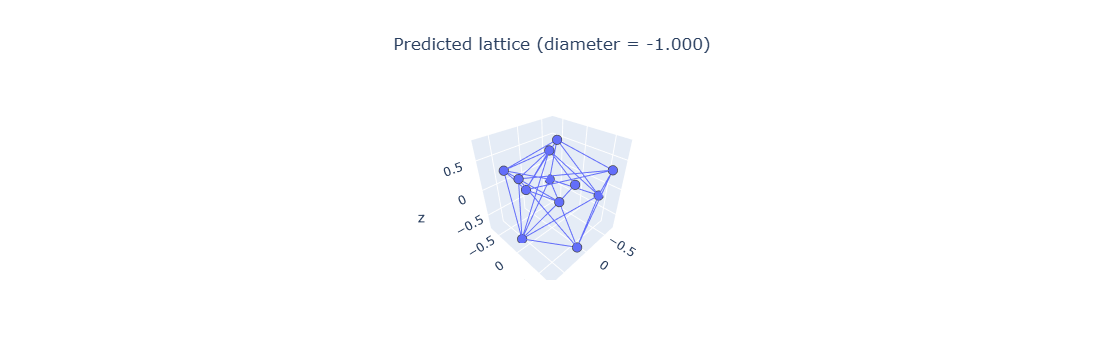

In [10]:
path = 'generated_mat/step50_equi_wsigma/'
name = 'LatticeStiffness_lattice_7.npz'
plot_lattice_from_path(path, name)

num_atoms tensor([10])
edge_index 
 [[0 0 1 0 1 2 0 1 2 3 0 1 2 3 4 0 1 2 3 4 5 0 1 2 3 4 5 6 0 1 2 3 4 5 6 7
  0 1 2 3 4 5 6 7 8]
 [1 2 2 3 3 3 4 4 4 4 5 5 5 5 5 6 6 6 6 6 6 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8
  9 9 9 9 9 9 9 9 9]]
Properteis:  [-0.01188661 -0.00146595 -0.00099815 -0.00149893  0.00711725  0.00497726
 -0.01994592  0.00706453 -0.00257818  0.0101031  -0.0024918  -0.01629981
 -0.00571898 -0.00061329 -0.0005935   0.00481449 -0.00056011  0.00965516
 -0.00074297 -0.00303816  0.00252424]
mean: -0.0010560162 
var: 0.0075383396


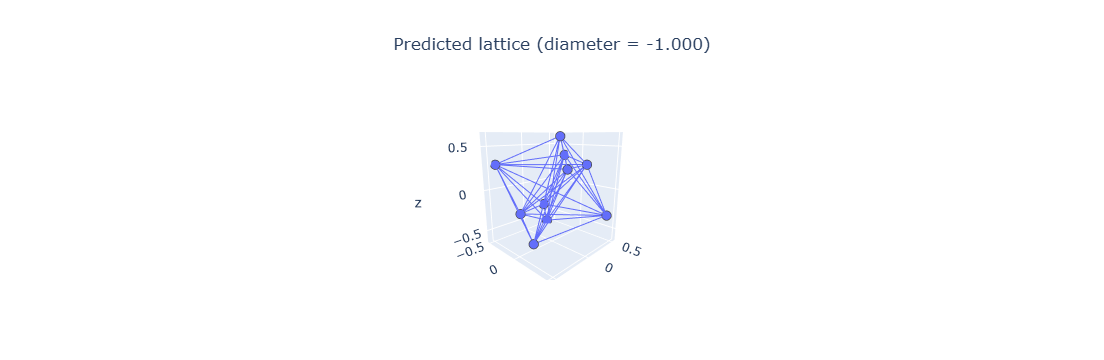

In [159]:
path = 'generated_mat/step50_varProp=0.01_2'
name = 'LatticeStiffness_lattice_2.npz'
plot_lattice_from_path(path, name)

num_atoms tensor([8])
edge_index 
 [[0 0 1 0 1 2 0 1 2 3 0 1 2 3 4 0 1 2 3 4 5 0 1 2 3 4 5 6]
 [1 2 2 3 3 3 4 4 4 4 5 5 5 5 5 6 6 6 6 6 6 7 7 7 7 7 7 7]]
Properteis:  [ 0.00581772  0.00192235  0.0035743  -0.00017794  0.00325564  0.00094465
  0.00517187  0.00461244  0.00179336  0.00286745  0.00016828  0.00881357
 -0.00071797  0.00174988 -0.00210747  0.00310337 -0.0013593   0.00310231
  0.0032191  -0.00026733  0.00233601]
mean: 0.0022772525 
var: 0.0025365723


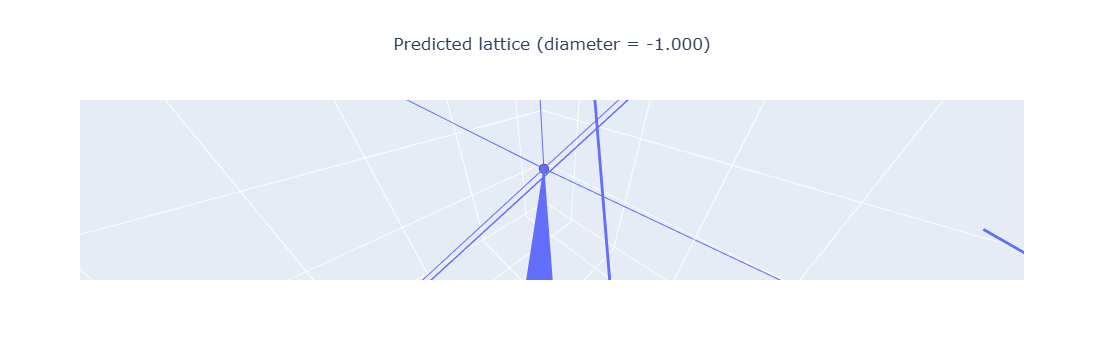

In [141]:
path = 'generated_mat/step50_varProp=v0.01_m0.5'
name = 'LatticeStiffness_lattice_1.npz'
plot_lattice_from_path(path, name)

num_atoms tensor([12])
edge_index 
 [[ 0  0  1  0  1  2  0  1  2  3  0  1  2  3  4  0  1  2  3  4  5  0  1  2
   3  4  5  6  0  1  2  3  4  5  6  7  0  1  2  3  4  5  6  7  8  0  1  2
   3  4  5  6  7  8  9  0  1  2  3  4  5  6  7  8  9 10]
 [ 1  2  2  3  3  3  4  4  4  4  5  5  5  5  5  6  6  6  6  6  6  7  7  7
   7  7  7  7  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9 10 10 10
  10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11]]
Properteis:  [-0.01368999 -0.01011289  0.01058061 -0.00098404  0.00972235  0.00267879
 -0.01178015  0.00772175  0.01144529  0.00565185  0.00027685  0.00273651
  0.00181086  0.01230436 -0.01131531  0.00078399 -0.00969135  0.01075679
  0.0119317   0.00071875 -0.00304011]
mean: 0.0013574586 
var: 0.008393847


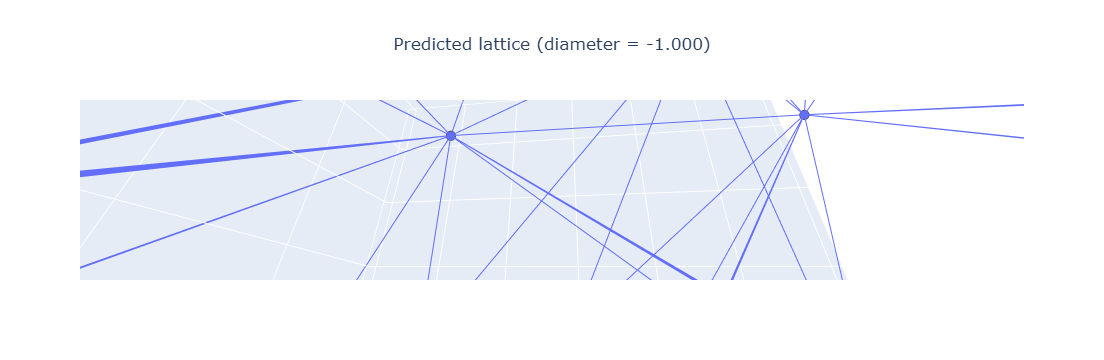

In [175]:
path = 'generated_mat/step50_varProp=0.01_m10'
name = 'LatticeStiffness_lattice_3.npz'
plot_lattice_from_path(path, name)

In [1]:
path = './generated_mat/step50_500'
file_names = os.listdir(path)
save_path = './vis/generated_mat/step50_500'
if not os.path.exists(save_path):
    os.mkdir(save_path)
for file_name in file_names:
    save_dir = os.path.join(save_path,file_name[:-3]+'png')
    plot_lattice_from_path(path, file_name,cutoff=1., max_num_neighbors_threshold=5, save_dir=save_dir)
    # plot_origin_lattice_from_path(path, name,cutoff=1., max_num_neighbors_threshold=5)

NameError: name 'os' is not defined